In [1]:
%cd /content/drive/MyDrive/Smart Parking Car/Code CV/License_plate_recog

/content/drive/MyDrive/Smart Parking Car/Code CV/License_plate_recog


In [ ]:
# !git clone https://github.com/Marsmallotr/License-Plate-Recognition.git
%cd License-Plate-Recognition
# install dependencies using pip
!pip install -r ./requirement.txt

/content/drive/MyDrive/Smart Parking Car/Code CV/License_plate_recog/License-Plate-Recognition
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)


In [ ]:
!pip install matplotlib

In [ ]:
from PIL import Image
import cv2
import torch
import math
import function.utils_rotate as utils_rotate
from IPython.display import display
import os
import function.helper as helper

In [ ]:
# load yolo model for detect and character detection stage
# please download yolov5 from our link on github
yolo_LP_detect = torch.hub.load('yolov5', 'custom', path='model/LP_detector.pt', force_reload=True, source='local')
yolo_license_plate = torch.hub.load('yolov5', 'custom', path='model/LP_ocr.pt', force_reload=True, source='local')

# set model confidence threshold
# yolo_LP_detect.conf = 0.6
yolo_license_plate.conf = 0.60

INFO:yolov5:YOLOv5 🚀 2022-5-13 torch 2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

YOLOv5 🚀 2022-5-13 torch 2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

INFO:yolov5:Fusing layers... 
Fusing layers... 
INFO:yolov5:Model summary: 290 layers, 20852934 parameters, 0 gradients
Model summary: 290 layers, 20852934 parameters, 0 gradients
INFO:yolov5:Adding AutoShape... 
Adding AutoShape... 
INFO:yolov5:YOLOv5 🚀 2022-5-13 torch 2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

YOLOv5 🚀 2022-5-13 torch 2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

INFO:yolov5:Fusing layers... 
Fusing layers... 
INFO:yolov5:Model summary: 290 layers, 20970123 parameters, 0 gradients
Model summary: 290 layers, 20970123 parameters, 0 gradients
INFO:yolov5:Adding AutoShape... 
Adding AutoShape... 


In [ ]:
#enter image path here
img_file = "image/bien1_vang.jpg"
img = cv2.imread(img_file)
plates = yolo_LP_detect(img, size=640)

In [ ]:
list_plates = plates.pandas().xyxy[0].values.tolist()
list_read_plates = set()
count = 0
if len(list_plates) == 0:
    lp = helper.read_plate(yolo_license_plate,img)
    if lp != "unknown":
        list_read_plates.add(lp)
else:
    for plate in list_plates:
        flag = 0
        x = int(plate[0]) # xmin
        y = int(plate[1]) # ymin
        w = int(plate[2] - plate[0]) # xmax - xmin
        h = int(plate[3] - plate[1]) # ymax - ymin
        crop_img = img[y:y+h, x:x+w]
        cv2.rectangle(img, (int(plate[0]),int(plate[1])), (int(plate[2]),int(plate[3])), color = (0,0,225), thickness = 2)
        cv2.imwrite("crop.jpg", crop_img)
        rc_image = cv2.imread("crop.jpg")
        lp = ""
        count+=1
        for cc in range(0,2):
            for ct in range(0,2):
                lp = helper.read_plate(yolo_license_plate, utils_rotate.deskew(crop_img, cc, ct))
                if lp != "unknown":
                    list_read_plates.add(lp)
                    cv2.putText(img, lp, (int(plate[0]), int(plate[1]-10)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
                    flag = 1
                    break
            if flag == 1:
                break

output_dir = "predict"  # Thư mục đầu ra
os.makedirs(output_dir, exist_ok=True)  # Tạo thư mục nếu chưa tồn tại

# Lưu ảnh vào thư mục predict
output_path = os.path.join(output_dir, "output.jpg")
cv2.imwrite(output_path, img)


True

{'29E-01566'}


<ipython-input-26-76fab2e23ad3>:6: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  img = img.resize((basewidth,hsize), Image.ANTIALIAS)


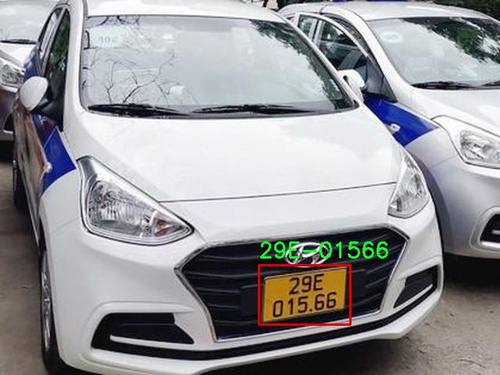

In [ ]:
print(list_read_plates)
img = Image.open(output_path)
basewidth = 500
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize), Image.ANTIALIAS)
display(img)

In [ ]:
from PIL import Image
import cv2
import torch
import math
import function.utils_rotate as utils_rotate
from IPython.display import display
import os
import function.helper as helper

# load yolo model for detect and character detection stage
# please download yolov5 from our link on github
yolo_LP_detect = torch.hub.load('yolov5', 'custom', path='model/LP_detector.pt', force_reload=True, source='local')
yolo_license_plate = torch.hub.load('yolov5', 'custom', path='model/LP_ocr.pt', force_reload=True, source='local')

# set model confidence threshold
# yolo_LP_detect.conf = 0.6
yolo_license_plate.conf = 0.60

#enter image path here
img_file = "image/bien1_vang.jpg"
img = cv2.imread(img_file)
plates = yolo_LP_detect(img, size=640)

list_plates = plates.pandas().xyxy[0].values.tolist()
list_read_plates = set()
count = 0
if len(list_plates) == 0:
    lp = helper.read_plate(yolo_license_plate,img)
    if lp != "unknown":
        list_read_plates.add(lp)
else:
    for plate in list_plates:
        flag = 0
        x = int(plate[0]) # xmin
        y = int(plate[1]) # ymin
        w = int(plate[2] - plate[0]) # xmax - xmin
        h = int(plate[3] - plate[1]) # ymax - ymin
        crop_img = img[y:y+h, x:x+w]
        cv2.rectangle(img, (int(plate[0]),int(plate[1])), (int(plate[2]),int(plate[3])), color = (0,0,225), thickness = 2)
        cv2.imwrite("crop.jpg", crop_img)
        rc_image = cv2.imread("crop.jpg")
        lp = ""
        count+=1
        for cc in range(0,2):
            for ct in range(0,2):
                lp = helper.read_plate(yolo_license_plate, utils_rotate.deskew(crop_img, cc, ct))
                if lp != "unknown":
                    list_read_plates.add(lp)
                    cv2.putText(img, lp, (int(plate[0]), int(plate[1]-10)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
                    flag = 1
                    break
            if flag == 1:
                break

output_dir = "predict"  # Thư mục đầu ra
os.makedirs(output_dir, exist_ok=True)  # Tạo thư mục nếu chưa tồn tại

# Lưu ảnh vào thư mục predict
output_path = os.path.join(output_dir, "output.jpg")
cv2.imwrite(output_path, img)

print(list_read_plates)
img = Image.open(output_path)
basewidth = 500
wpercent = (basewidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((basewidth,hsize), Image.ANTIALIAS)
display(img)


### Video


In [ ]:
# @title
from PIL import Image
import cv2
import torch
import math
import function.utils_rotate as utils_rotate
from IPython.display import display
import os
import time
import argparse
import function.helper as helper

# load model
yolo_LP_detect = torch.hub.load('yolov5', 'custom', path='model/LP_detector_nano_61.pt', force_reload=True, source='local')
yolo_license_plate = torch.hub.load('yolov5', 'custom', path='model/LP_ocr_nano_62.pt', force_reload=True, source='local')
yolo_license_plate.conf = 0.60

prev_frame_time = 0
new_frame_time = 0

#vid = cv2.VideoCapture(1)
vid = cv2.VideoCapture("test_6.mp4")


output_dir = "predict"  # Thư mục đầu ra
os.makedirs(output_dir, exist_ok=True)  # Tạo thư mục nếu chưa tồn tại

# Tạo đối tượng ghi video
output_path = os.path.join(output_dir, "output.mp4")
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
output_video = None  # Khởi tạo đối tượng ghi video

while(True):
    ret, frame = vid.read()
    # Kiểm tra xem việc đọc khung hình từ video có thành công hay không
    if not ret:
        break

    # Tạo đối tượng ghi video nếu chưa được khởi tạo
    if output_video is None:
        output_video = cv2.VideoWriter(output_path, fourcc, 30.0, (frame.shape[1], frame.shape[0]))

    plates = yolo_LP_detect(frame, size=640)
    list_plates = plates.pandas().xyxy[0].values.tolist()
    list_read_plates = set()
    for plate in list_plates:
        flag = 0
        x = int(plate[0]) # xmin
        y = int(plate[1]) # ymin
        w = int(plate[2] - plate[0]) # xmax - xmin
        h = int(plate[3] - plate[1]) # ymax - ymin
        crop_img = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (int(plate[0]),int(plate[1])), (int(plate[2]),int(plate[3])), color = (0,0,225), thickness = 2)
        cv2.imwrite("crop.jpg", crop_img)
        rc_image = cv2.imread("crop.jpg")
        lp = ""
        for cc in range(0,2):
            for ct in range(0,2):
                lp = helper.read_plate(yolo_license_plate, utils_rotate.deskew(crop_img, cc, ct))
                if lp != "unknown":
                    list_read_plates.add(lp)
                    cv2.putText(frame, lp, (int(plate[0]), int(plate[1]-10)), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (36,255,12), 2)
                    flag = 1
                    break
            if flag == 1:
                break
    new_frame_time = time.time()
    fps = 1/(new_frame_time-prev_frame_time)
    prev_frame_time = new_frame_time
    fps = int(fps)
    cv2.putText(frame, str(fps), (7, 70), cv2.FONT_HERSHEY_SIMPLEX, 3, (100, 255, 0), 3, cv2.LINE_AA)
    # cv2.imshow('frame', frame)
    # if cv2.waitKey(1) & 0xFF == ord('q'):
    #     break
    output_video.write(frame)

#vid.release()
output_video.release()
cv2.destroyAllWindows()

INFO:yolov5:YOLOv5 🚀 2022-5-13 torch 2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

YOLOv5 🚀 2022-5-13 torch 2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

INFO:yolov5:Fusing layers... 
Fusing layers... 
INFO:yolov5:Model summary: 213 layers, 1760518 parameters, 0 gradients
Model summary: 213 layers, 1760518 parameters, 0 gradients
INFO:yolov5:Adding AutoShape... 
Adding AutoShape... 
INFO:yolov5:YOLOv5 🚀 2022-5-13 torch 2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

YOLOv5 🚀 2022-5-13 torch 2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

INFO:yolov5:Fusing layers... 
Fusing layers... 
INFO:yolov5:Model summary: 213 layers, 1799755 parameters, 0 gradients
Model summary: 213 layers, 1799755 parameters, 0 gradients
INFO:yolov5:Adding AutoShape... 
Adding AutoShape... 
